**Nama : Yolanda Ester Berliana Ritonga**

#**Import Semua Packages/Library yang Digunakan**

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
od.download('https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yolandaesterbritonga
Your Kaggle Key: ··········


100%|██████████| 8.91k/8.91k [00:00<00:00, 13.4MB/s]

In [ ]:
df = pd.read_csv('/content/diabetes-dataset/diabetes.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

#**Menghitung Missing Values & Duplikat pada Data**

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


#**Exploratory Data Analysis (EDA)**

In [ ]:
# Menghitung statistik deskriptif tentang usia
age_stats = df['Age'].describe()

# Menampilkan informasi statistik deskriptif tentang usia
print("\nStatistik Deskriptif tentang Usia:")
print(age_stats)

# Menghitung median usia
median_age = df['Age'].median()
print("\nMedian Usia:", median_age)

# Menghitung modus usia
mode_age = df['Age'].mode()[0]
print("\nModus Usia:", mode_age)

# Menghitung standar deviasi usia
std_dev_age = df['Age'].std()
print("\nStandar Deviasi Usia:", std_dev_age)


Statistik Deskriptif tentang Usia:
count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

Median Usia: 29.0

Modus Usia: 22

Standar Deviasi Usia: 11.760231540678685


Dalam dataset ini, kami mengeksplorasi informasi tentang usia dari kelompok yang diteliti. Berdasarkan analisis kami, kami menemukan bahwa usia rata-rata dari kelompok ini adalah 33 tahun, dengan usia terbanyak (modus) adalah 22 tahun. Nilai tengah atau median usia dari kelompok ini adalah 29.0. Selain itu, kami menemukan bahwa usia dalam kelompok ini memiliki variasi yang cukup signifikan, di mana standar deviasi usia sebesar 11.76.

In [ ]:
# Menghitung statistik deskriptif tentang BMI
bmi_stats = df['BMI'].describe()

# Menampilkan informasi statistik deskriptif tentang BMI
print("\nStatistik Deskriptif tentang BMI:")
print(bmi_stats)

# Membandingkan BMI dengan kategori BMI umum
# Kategori BMI: Normal (18.5 - 24.9), Overweight (25 - 29.9), Obese (>30)
normal_count = df[(df['BMI'] >= 18.5) & (df['BMI'] <= 24.9)].shape[0]
overweight_count = df[(df['BMI'] >= 25) & (df['BMI'] <= 29.9)].shape[0]
obese_count = df[df['BMI'] > 30].shape[0]

print("\nJumlah Orang dengan BMI Normal:", normal_count)
print("Jumlah Orang dengan BMI Overweight:", overweight_count)
print("Jumlah Orang dengan BMI Obese:", obese_count)

# Menyajikan informasi tentang kategori BMI dalam persentase
total_people = len(df)
normal_percentage = (normal_count / total_people) * 100
overweight_percentage = (overweight_count / total_people) * 100
obese_percentage = (obese_count / total_people) * 100

print("\nPersentase Orang dengan BMI Normal:", round(normal_percentage, 2), "%")
print("Persentase Orang dengan BMI Overweight:", round(overweight_percentage, 2), "%")
print("Persentase Orang dengan BMI Obese:", round(obese_percentage, 2), "%")


Statistik Deskriptif tentang BMI:
count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

Jumlah Orang dengan BMI Normal: 102
Jumlah Orang dengan BMI Overweight: 179
Jumlah Orang dengan BMI Obese: 465

Persentase Orang dengan BMI Normal: 13.28 %
Persentase Orang dengan BMI Overweight: 23.31 %
Persentase Orang dengan BMI Obese: 60.55 %


Berdasarkan hasil analisis, terdapat 768 data individu yang telah diamati dalam dataset ini. Rata-rata BMI dari populasi ini adalah sekitar 32, dengan standar deviasi sebesar 7.88. Distribusi BMI dalam populasi ini cukup bervariasi, dengan BMI minimum adalah 0 dan maksimum adalah 67.1.

Dari segi kategori BMI umum, ditemukan bahwa 102 individu memiliki BMI dalam rentang normal (18.5 - 24.9), yang merupakan sekitar 13.28% dari total populasi. Selanjutnya, 179 individu memiliki BMI dalam rentang overweight (25 - 29.9), atau sekitar 23.31% dari populasi. Sementara itu, mayoritas populasi, sebanyak 465 individu atau sekitar 60.55%, memiliki BMI yang masuk dalam kategori obesitas (>30).

Temuan ini menunjukkan bahwa sebagian besar populasi dalam dataset memiliki BMI yang berada di luar rentang normal, dengan mayoritas individu cenderung mengalami obesitas. Hal ini memberikan wawasan penting tentang kondisi kesehatan dalam populasi yang diteliti, dan menunjukkan pentingnya upaya pencegahan dan manajemen berat badan untuk mengurangi risiko masalah kesehatan yang terkait dengan diabetes.

In [ ]:
# 1. Statistik Deskriptif untuk BloodPressure
blood_pressure_stats = df['BloodPressure'].describe()
print("Statistik Deskriptif BloodPressure:")
print(blood_pressure_stats)

# 2. Menentukan kategori tekanan darah (tinggi, sedang, rendah)
# Kategori tekanan darah: tinggi (>= 140), sedang (90-139), rendah (<= 90)
high_bp_count = df[df['BloodPressure'] >= 140].shape[0]
normal_bp_count = df[(df['BloodPressure'] >= 90) & (df['BloodPressure'] < 140)].shape[0]
low_bp_count = df[df['BloodPressure'] < 90].shape[0]

print("\nJumlah Orang dengan Tekanan Darah Tinggi:", high_bp_count)
print("Jumlah Orang dengan Tekanan Darah Sedang:", normal_bp_count)
print("Jumlah Orang dengan Tekanan Darah Rendah:", low_bp_count)

# 3. Korelasi BloodPressure dengan BMI
correlation_bp_bmi = df['BloodPressure'].corr(df['BMI'])
print("\nKorelasi antara BloodPressure dan BMI:", correlation_bp_bmi)

Statistik Deskriptif BloodPressure:
count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

Jumlah Orang dengan Tekanan Darah Tinggi: 0
Jumlah Orang dengan Tekanan Darah Sedang: 60
Jumlah Orang dengan Tekanan Darah Rendah: 708

Korelasi antara BloodPressure dan BMI: 0.2818052888499106


Berdasarkan hasil analisis statistik deskriptif, kita dapat melihat bahwa dataset terdiri dari 768 data individu. Rata-rata tekanan darah (BloodPressure) dalam populasi ini adalah sekitar 69 mmHg, dengan standar deviasi sebesar 19.36 mmHg. Tekanan darah minimum yang tercatat adalah 0 mmHg, sedangkan tekanan darah maksimum adalah 122 mmHg. Persebaran tekanan darah dalam populasi ini memiliki kuartil bawah sebesar 62 mmHg, kuartil tengah sebesar 72 mmHg, dan kuartil atas sebesar 80 mmHg.

Selanjutnya, ketika kita membagi data berdasarkan kriteria tekanan darah, kita melihat bahwa tidak ada individu dalam dataset ini yang memiliki tekanan darah yang tergolong tinggi (>= 140 mmHg). Namun, sebanyak 60 individu memiliki tekanan darah dalam rentang normal (90-139 mmHg), sementara sebagian besar individu (708) memiliki tekanan darah yang tergolong rendah (<= 90 mmHg).

Analisis korelasi antara BloodPressure dan BMI menunjukkan koefisien korelasi sebesar 0.2818, yang menunjukkan adanya hubungan positif yang sedang antara tekanan darah dan indeks massa tubuh (BMI). Ini menunjukkan bahwa semakin tinggi nilai BMI, semakin tinggi pula kemungkinan memiliki tekanan darah yang lebih tinggi.

Dengan demikian, kesimpulan dari analisis ini adalah bahwa mayoritas individu dalam dataset memiliki tekanan darah yang tergolong rendah, dengan sebagian kecil memiliki tekanan darah dalam rentang normal. Selain itu, terdapat hubungan positif yang sedang antara tekanan darah dan BMI, yang menunjukkan pentingnya menjaga berat badan dalam menjaga kesehatan tekanan darah. Informasi ini dapat menjadi bahan pertimbangan dalam upaya pencegahan dan manajemen tekanan darah rendah serta dalam menerapkan gaya hidup sehat.

In [ ]:
# 1. Statistik Deskriptif untuk Glukosa
glucose_stats = df['Glucose'].describe()
print("Statistik Deskriptif Glukosa:")
print(glucose_stats)

# 2. Menentukan apakah cenderung memiliki tingkat glukosa di atas rata-rata atau tidak
mean_glucose = glucose_stats['mean']
above_average_glucose = df[df['Glucose'] > mean_glucose].shape[0]
below_average_glucose = df[df['Glucose'] <= mean_glucose].shape[0]

print("\nJumlah Orang dengan Glukosa di Atas Rata-rata:", above_average_glucose)
print("Jumlah Orang dengan Glukosa di Bawah atau Sama dengan Rata-rata:", below_average_glucose)

Statistik Deskriptif Glukosa:
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

Jumlah Orang dengan Glukosa di Atas Rata-rata: 349
Jumlah Orang dengan Glukosa di Bawah atau Sama dengan Rata-rata: 419


Berdasarkan hasil analisis statistik deskriptif pada kolom Glukosa (Glucose), dapat dilihat bahwa dataset terdiri dari 768 data individu. Rata-rata kadar glukosa dalam populasi ini adalah sekitar 120.89 mg/dL, dengan standar deviasi sebesar 31.97 mg/dL. Kadar glukosa minimum yang tercatat adalah 0 mg/dL, sedangkan kadar glukosa maksimum adalah 199 mg/dL. Persebaran kadar glukosa dalam populasi ini memiliki kuartil bawah sebesar 99 mg/dL, kuartil tengah sebesar 117 mg/dL, dan kuartil atas sebesar 140.25 mg/dL.

Ketika kita membagi data berdasarkan kriteria memiliki glukosa di atas atau di bawah rata-rata, kita dapat melihat bahwa sebanyak 349 individu memiliki kadar glukosa di atas rata-rata, sementara 419 individu memiliki kadar glukosa di bawah atau sama dengan rata-rata.

Dari analisis ini, dapat disimpulkan bahwa sebagian besar individu dalam dataset memiliki kadar glukosa yang berada di bawah atau sekitar rata-rata populasi. Namun, ada juga sejumlah signifikan individu yang memiliki kadar glukosa di atas rata-rata, yang mungkin perlu perhatian khusus dalam pemantauan dan manajemen kesehatannya.

In [ ]:
correlation_with_outcome = df.corr()['Outcome'].abs().sort_values(ascending=False)
print("Korelasi Kolom dengan Outcome:")
print(correlation_with_outcome)

# Menghitung jumlah yang mengidap diabetes (Outcome = 1) dan tidak (Outcome = 0)
diabetes_count = df[df['Outcome'] == 1].shape[0]
non_diabetes_count = df[df['Outcome'] == 0].shape[0]

print("\nJumlah yang mengidap diabetes:", diabetes_count)
print("Jumlah yang tidak mengidap diabetes:", non_diabetes_count)

Korelasi Kolom dengan Outcome:
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

Jumlah yang mengidap diabetes: 268
Jumlah yang tidak mengidap diabetes: 500


Berdasarkan hasil analisis korelasi antara setiap kolom dengan kolom Outcome (yang mewakili status diabetes), kita dapat menarik beberapa kesimpulan yang dapat menjadi bahan informasi untuk pemahaman lebih lanjut tentang faktor-faktor yang berpengaruh dalam menentukan apakah seseorang memiliki diabetes atau tidak:

1. **Glukosa (Glucose)**: Kolom Glukosa memiliki korelasi tertinggi dengan kolom Outcome, dengan nilai korelasi sebesar 0.466581. Ini menunjukkan bahwa kadar glukosa dalam darah memiliki pengaruh yang signifikan dalam menentukan apakah seseorang memiliki diabetes atau tidak. Tingginya nilai korelasi ini menegaskan pentingnya pemantauan dan pengelolaan kadar glukosa dalam upaya pencegahan dan manajemen diabetes.

2. **Indeks Massa Tubuh (BMI)**: Kolom BMI memiliki korelasi tertinggi kedua dengan kolom Outcome, dengan nilai korelasi sebesar 0.292695. Ini menunjukkan bahwa BMI, yang merupakan indikator utama dari kelebihan berat badan atau obesitas, juga berperan penting dalam menentukan status diabetes. Penelitian telah menunjukkan bahwa obesitas adalah salah satu faktor risiko utama untuk pengembangan diabetes tipe 2, dan hasil ini menguatkan temuan tersebut.

3. **Usia (Age)**: Kolom Usia memiliki korelasi dengan kolom Outcome sebesar 0.238356, menunjukkan bahwa usia juga memiliki pengaruh yang signifikan dalam risiko diabetes. Risiko diabetes cenderung meningkat seiring bertambahnya usia, dan temuan ini mendukung pola tersebut.

4. **Kehamilan (Pregnancies)**: Kolom Kehamilan memiliki korelasi yang cukup tinggi dengan kolom Outcome (0.221898), menunjukkan bahwa riwayat kehamilan juga dapat menjadi faktor yang berpengaruh dalam risiko diabetes. Ini menunjukkan perlunya memperhatikan riwayat kehamilan dalam evaluasi risiko diabetes pada wanita.

5. **Fungsi Garis Keturunan Diabetes (DiabetesPedigreeFunction)**: Kolom Fungsi Garis Keturunan Diabetes memiliki korelasi yang cukup signifikan (0.173844) dengan kolom Outcome. Ini menunjukkan bahwa faktor genetik atau riwayat keluarga juga berkontribusi dalam menentukan risiko diabetes pada individu.

Dengan demikian, dari hasil analisis korelasi ini, dapat disimpulkan bahwa faktor-faktor seperti kadar glukosa, BMI, usia, riwayat kehamilan, dan faktor genetik memiliki pengaruh yang signifikan dalam menentukan apakah seseorang memiliki diabetes atau tidak. Informasi ini dapat digunakan sebagai dasar untuk pengembangan strategi pencegahan, pengelolaan, dan intervensi yang lebih efektif dalam mengatasi masalah diabetes. Serta dari data tersebut dapat disimpulkan bahwasanya terdapat 268 orang yang dinyatakan mengidap penyakit diabetes sedangkan 500 lainnya tidak dinyatakan mengidap penyakit diabetes

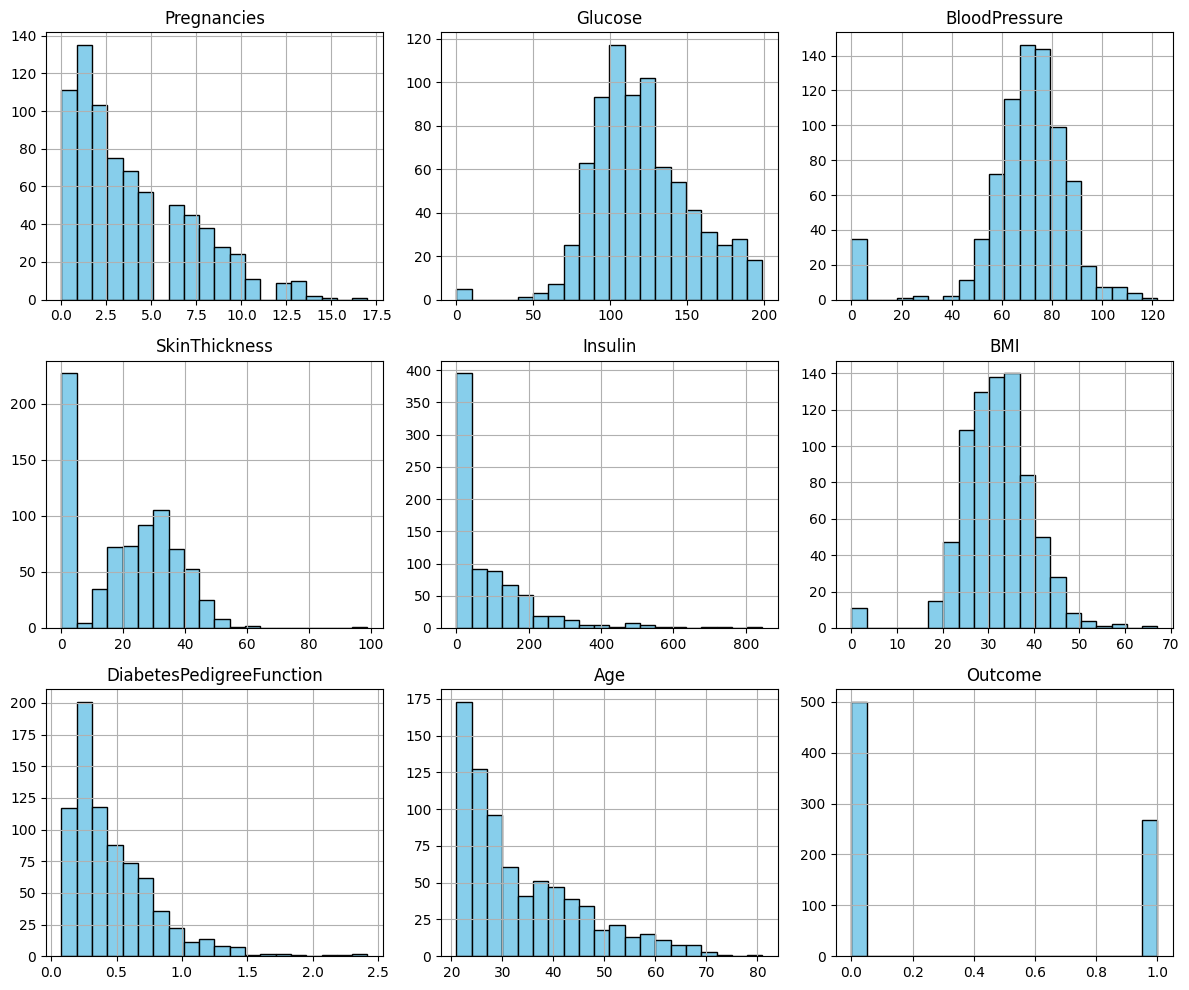

In [ ]:
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()  # Mengatur layout agar visualisasi lebih rapi
plt.show()

#**Visualization & Explanatory Analysis**

##Pertanyaan 1 : Bagaimana distribusi umur di antara pasien diabetes dan non-diabetes?

- Mencari umur pasien yang banyak terkena diabetes

In [ ]:
# Membagi data menjadi kelompok berdasarkan rentang umur
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Menghitung jumlah kasus diabetes di setiap rentang umur
diabetes_by_age = df[df['Outcome'] == 1]['Age_Group'].value_counts().sort_index()

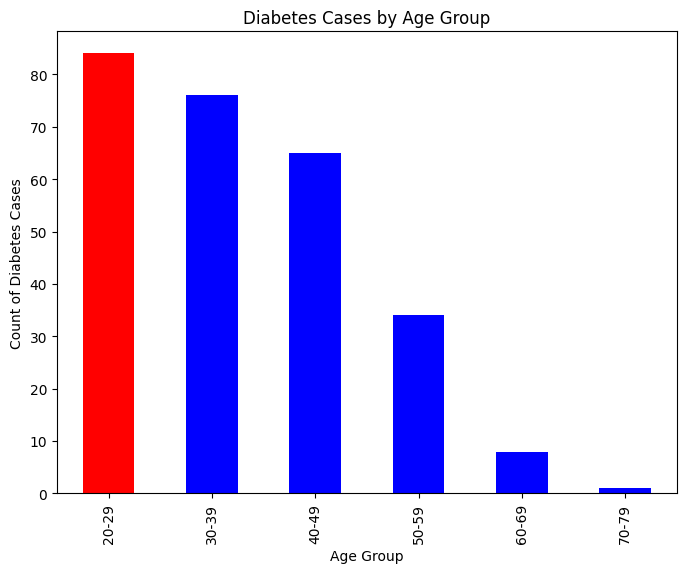

In [ ]:
# Visualisasi
plt.figure(figsize=(8, 6))
diabetes_by_age.plot(kind='bar', color=['blue' if x < max(diabetes_by_age) else 'red' for x in diabetes_by_age])
plt.xlabel('Age Group')
plt.ylabel('Count of Diabetes Cases')
plt.title('Diabetes Cases by Age Group')
plt.show()

Dapat dilihat pada grafik bar yang telah disajikan, bahwa rentang umur yang mengalami penyakit diabetes ada diantara umur 20-29 dimana melebihi 80 orang jumlahnya, dan yang terendah yaitu pada rentang umur 70-79 tahun dimana jumlahnya tidak sampai 10 orang.

- Mencari umur pasien yang banyak tidak terkena diabetes

In [ ]:
# Menghitung jumlah kasus non-diabetes di setiap rentang umur
non_diabetes_by_age = df[df['Outcome'] == 0]['Age_Group'].value_counts().sort_index()

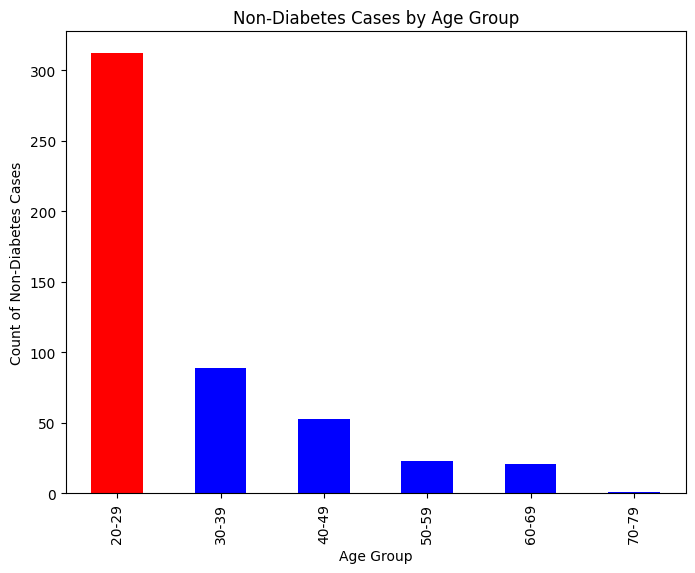

In [ ]:
# Visualisasi
plt.figure(figsize=(8, 6))
non_diabetes_by_age.plot(kind='bar', color=['blue' if x < max(non_diabetes_by_age) else 'red' for x in non_diabetes_by_age])
plt.xlabel('Age Group')
plt.ylabel('Count of Non-Diabetes Cases')
plt.title('Non-Diabetes Cases by Age Group')
plt.show()

Dapat dilihat pada grafik bar yang telah disajikan, bahwa rentang umur yang tidak mengalami penyakit diabetes ada diantara umur 20-29 dimana melebihi 300 orang jumlahnya, dan yang terendah yaitu pada rentang umur 70-79 tahun dimana jumlahnya nyaris menyentuh angka 0.

##Pertanyaan 2 : Apakah pasien dengan jumlah kehamilan yang lebih tinggi memiliki risiko diabetes yang lebih tinggi?

In [ ]:
# Distribusi jumlah kehamilan untuk pasien diabetes
pregnancies_diabetes = df[df['Outcome'] == 1]['Pregnancies']

# Distribusi jumlah kehamilan untuk pasien non-diabetes
pregnancies_non_diabetes = df[df['Outcome'] == 0]['Pregnancies']

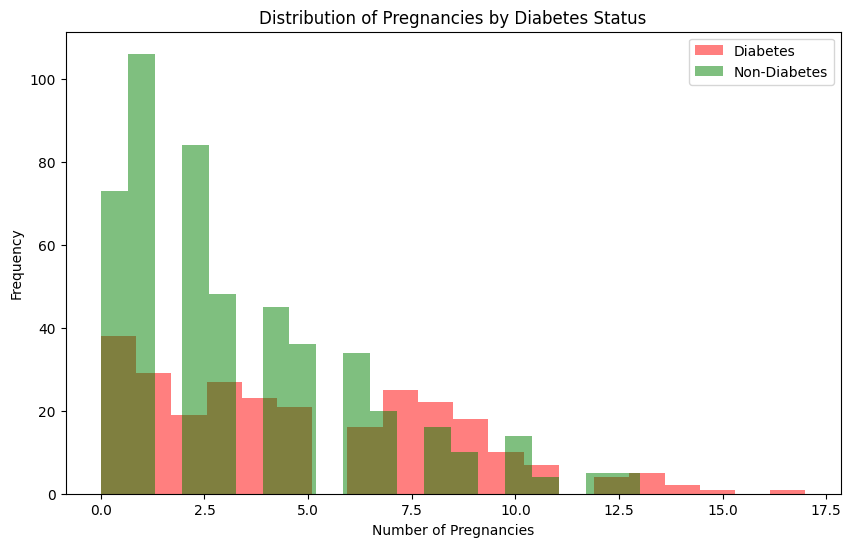

In [ ]:
# Visualisasi
plt.figure(figsize=(10, 6))

# Histogram untuk pasien diabetes
plt.hist(pregnancies_diabetes, bins=20, color='red', alpha=0.5, label='Diabetes')

# Histogram untuk pasien non-diabetes
plt.hist(pregnancies_non_diabetes, bins=20, color='green', alpha=0.5, label='Non-Diabetes')

plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')
plt.title('Distribution of Pregnancies by Diabetes Status')
plt.legend()
plt.show()


Dari visualisasi histogram di atas, terlihat bahwa jumlah pasien hamil yang mengalami diabetes cenderung lebih sedikit dibandingkan dengan jumlah pasien hamil yang tidak mengalami diabetes. Ini mengindikasikan bahwa pasien dengan jumlah kehamilan yang lebih tinggi tidak secara signifikan memiliki risiko diabetes yang lebih tinggi.

## Pertanyaan 3 : Apakah pasien dengan indeks massa tubuh (BMI) yang tinggi memiliki risiko diabetes yang lebih tinggi?

Disini kami akan membagi menjadi dua kelompok berdasarka indeks massa tubuh (BMI) yaitu BMI tinggi (>30) yang dikategorikan sebagai *Obesitas* dan kelompok BMI rendah (<=30) yang dikategorikan sebagai berat badan *Normal*

In [ ]:
# Memisahkan data antara pasien dengan BMI tinggi dan rendah
high_bmi = df[df['BMI'] > 30]
low_bmi = df[df['BMI'] <= 30]

# Menghitung jumlah pasien diabetes di masing-masing kelompok
high_bmi_diabetes = high_bmi['Outcome'].sum()
low_bmi_diabetes = low_bmi['Outcome'].sum()

# Menghitung total pasien di masing-masing kelompok
high_bmi_total = len(high_bmi)
low_bmi_total = len(low_bmi)

# Persentase pasien diabetes di masing-masing kelompok
high_bmi_diabetes_percentage = (high_bmi_diabetes / high_bmi_total) * 100
low_bmi_diabetes_percentage = (low_bmi_diabetes / low_bmi_total) * 100


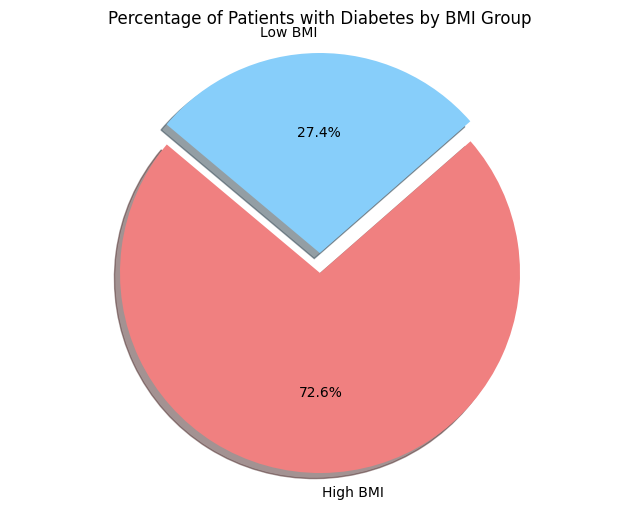

In [ ]:
# Visualisasi
labels = ['High BMI', 'Low BMI']
sizes = [high_bmi_diabetes_percentage, low_bmi_diabetes_percentage]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Percentage of Patients with Diabetes by BMI Group')
plt.show()

Dari hasil visualisasi di atas dapat kita simpulkan bahwa pasien yang memiliki BMI tinggi (>30) cenderung memiliki risiko penyakit diabetes yang lebih tinggi yaitu sebesar 72.6% dibanding pasien yang memiliki BMI rendah (<=30) yaitu 27.4%.

#Conclusion

1. **Distribusi Umur dan Diabetes:**
   - Rentang umur pasien yang mengalami diabetes paling banyak adalah antara 20 hingga 29 tahun, dengan lebih dari 80 orang terkena diabetes. Jumlah pasien diabetes kemudian menurun seiring dengan peningkatan usia, dengan jumlah terendah pada rentang umur 70 hingga 79 tahun.
   - Di sisi lain, rentang umur yang tidak mengalami diabetes adalah antara 20 hingga 29 tahun, dengan lebih dari 300 orang tidak terkena diabetes. Jumlah pasien yang tidak mengalami diabetes kemudian menurun secara signifikan seiring bertambahnya usia, dan hampir tidak ada pasien non-diabetes pada rentang umur 70 hingga 79 tahun.

2. **Risiko Diabetes dan Jumlah Kehamilan:**
   - Dari visualisasi histogram, terlihat bahwa jumlah pasien hamil yang mengalami diabetes cenderung lebih sedikit dibandingkan dengan pasien hamil yang tidak mengalami diabetes. Ini menunjukkan bahwa tidak ada korelasi yang signifikan antara jumlah kehamilan dan risiko diabetes.

3. **Risiko Diabetes dan Indeks Massa Tubuh (BMI):**
   - Pasien dengan BMI tinggi (>30) atau yang terkategori sebagai obesitas memiliki risiko diabetes yang lebih tinggi, dengan persentase pasien diabetes sebesar 72.6%. Di sisi lain, pasien dengan BMI rendah (<=30) atau yang terkategori sebagai berat badan normal memiliki risiko diabetes yang lebih rendah, dengan persentase pasien diabetes sebesar 27.4%.

**Summary Conclusion**

Dengan demikian, hasil analisis menunjukkan bahwa faktor BMI memiliki korelasi yang kuat dengan risiko diabetes, sementara jumlah kehamilan tidak secara signifikan mempengaruhi risiko diabetes. Namun, penting untuk dicatat bahwa analisis ini hanya berdasarkan pada data yang tersedia dan kemungkinan terdapat faktor lain yang dapat memengaruhi risiko diabetes yang tidak diakomodasi dalam analisis ini.